In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.datasets import load_iris, load_breast_cancer, load_wine
import sys

sys.path.insert(0, 'C:\\python_projects\\CountsOutlierDetection_project\\CountsOutlierDetector')
from CountsOutlierDetector import CountsOutlierDetector

## Create an Instance of the Counts Outlier Detector

In [2]:
det = CountsOutlierDetector()

## Simple Example with no Correlation Between Columns

In [3]:
# Create random, uniform data with 500 rows and 10 columns
a = np.random.uniform(low=0.0, high=100.0, size=(500, 10))

# Create a row with one unusual value
a[0,0] = 1000.0

# Create a row with two unusual values
a[1,0] = 1100.0
a[1,1] = 1200.0

a = pd.DataFrame(a)

flagged_rows_df, row_explanations, output_msg, run_summary_df = det.predict(a)

In [4]:
# The output_msg provides a string representation of the outlier detection process, indicating, for each number of 
# dimensions checked, the number of rows flagged different numbers of times. For example, when considering 1d outliers 
# (values that are rare in a single column), rows may be flagged in 0 or more columns. 

print(output_msg)


Number of rows: 500
Number of columns: 10
Cardinality of the columns: [2, 2, 7, 7, 7, 7, 7, 7, 7, 7]

1d: num common values: 58
1d: num rare values: 2
1d: Outlier Counts by score: 0:   498
1d: Outlier Counts by score: 1:     1
1d: Outlier Counts by score: 2:     1

2d: num common combinations: 1599
2d: num rare combinations: 1 (Typically most with zero rows)
2d: Outlier Counts by score: 0:   499
2d: Outlier Counts by score: 1:     1

3d: num common combinations: 224
3d: num rare combinations: 0 (Typically most with zero rows)
3d: Outlier Counts by score: 0:   500

4d: num common combinations: 0
4d: num rare combinations: 0 (Typically most with zero rows)
4d: Outlier Counts by score: 0:   500

Cannot determine 5d outliers given the number of categorical columns (10) and number of unique values in each.

Number of rows flagged as outliers examining 1d: 2 (0.4%)
Number of rows flagged as outliers examining 2d: 1 (0.2%)
Number of rows flagged as outliers examining 3d: 0 (0.0%)
Number of r

In [5]:
# run_summary_df gives a higher level of summary, indicating how many rows were flagged checking each dimension (regarless
# of how many times each rows was flagged -- they may have, for example, 1 unual pair of values, or 3 unusual pairs 
# of values).

run_summary_df

,Percent Flagged as 1d,Percent Flagged as 2d,Percent Flagged as 3d,Percent Flagged as 4d,Percent Flagged as 5d,Percent Flagged up to 1d,Percent Flagged up to 2d,Percent Flagged up to 3d,Percent Flagged up to 4d,Percent Flagged up to 5d,Checked_3d,Checked_4d,Checked_5d,3d column combos checked,4d column combos checked,5d column combos checked,Percent Flagged
0,0.4,0.2,0.0,0.0,0.0,0.4,0.6,0.6,0.6,0.6,1.0,1.0,0.0,8.0,0.0,-1.0,0.6


In [6]:
# The flagged_rows dataframe returned contains statistics about each row. In most cases, these are not useful to examine
# other than for modifying the scoring system. A dataframe row_explanations is also provided, and an example is given
# here. This has a row for each row in the data that was flagged at least once, along with the explanations for each 
# unusual value or combination of values. 

row_explanations

,Row Index,1d Explanations,2d Explanations,3d Explanations,4d Explanations,5d Explanations
0,0,"[Column: 0, Value: Bin 6, fraction: 0.004]",,,,
1,1,"[Column: 0, Value: Bin 6, fraction: 0.004][Col...",,,,
2,252,,"[[Columns: 4 and 9 Values: Bin 5 and Bin 4, F...",,,


In [7]:
row_explanations.iloc[0]['1d Explanations']

'[Column: 0, Value: Bin 6, fraction: 0.004]'

## Example with Correlation Between Columns (allowing multi-dimensional outliers)

In [8]:
np.random.seed(0)
X, y= make_classification(n_samples=500, n_features=6, n_informative=1, n_redundant=3, n_repeated=1, n_clusters_per_class=1)
X = pd.DataFrame(X)
X['Outlier'] = False

# Set 3 random rows to random values, setting 1 to 3 columns to realistic, but different values
X.at[0,0] = X.iloc[1, 0]
X.at[0, 'Outlier'] = True

X.at[1,0] = X.iloc[10, 0]
X.at[1,1] = X.iloc[11, 1]
X.at[1, 'Outlier'] = True

X.at[2,0] = X.iloc[30, 0]
X.at[2,1] = X.iloc[31, 1]
X.at[2,2] = X.iloc[32, 1]
X.at[2, 'Outlier'] = True

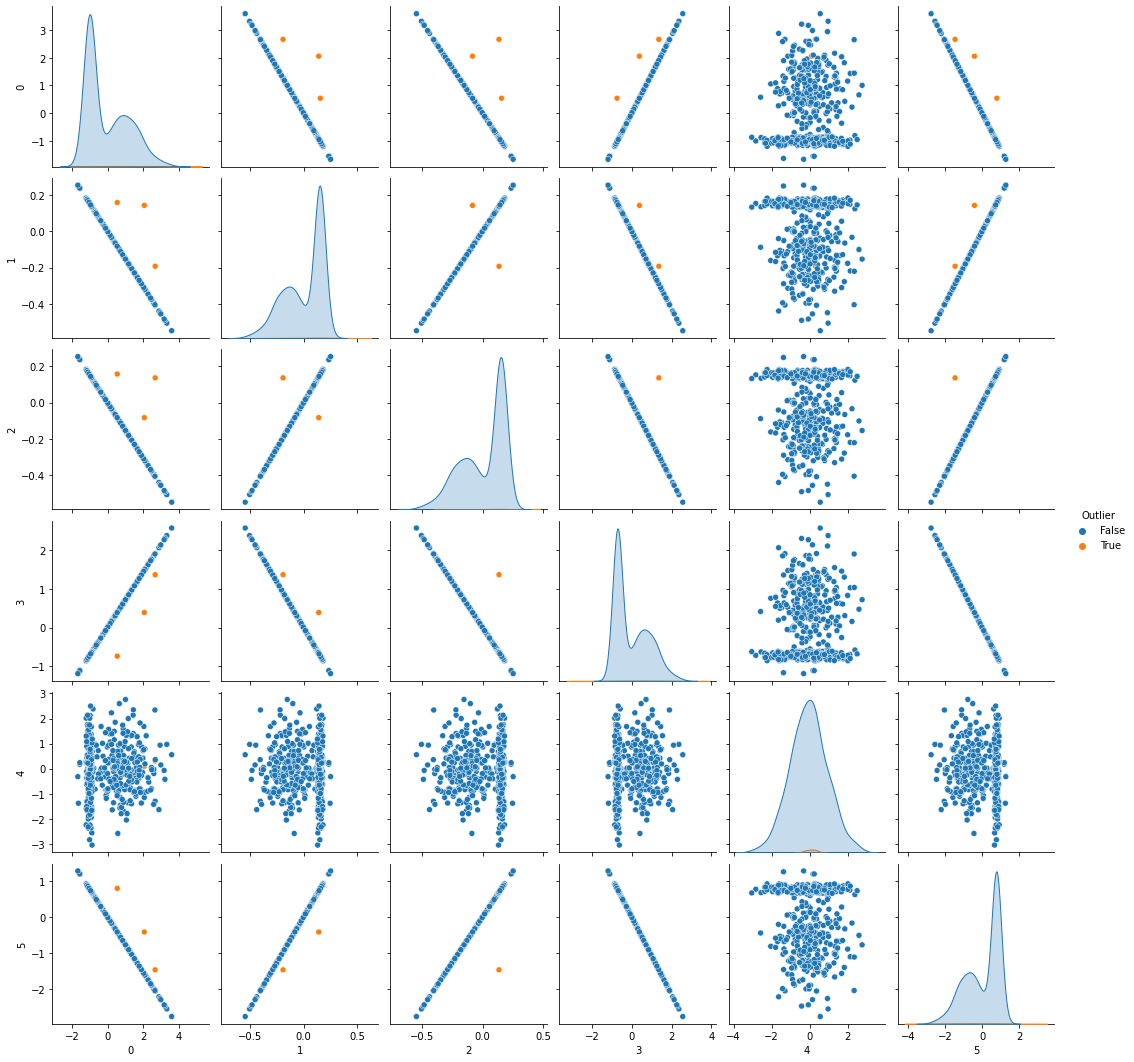

In [9]:
import warnings
warnings.filterwarnings('ignore' )

sns.pairplot(X, hue='Outlier')

In [10]:
X_test = X.drop(columns=['Outlier'])
flagged_rows_df, row_explanations, output_msg, run_summary_df = det.predict(X_test)

In [11]:
print(output_msg)


Number of rows: 500
Number of columns: 6
Cardinality of the columns: [7, 7, 7, 7, 7, 7]

1d: num common values: 42
1d: num rare values: 0
1d: Outlier Counts by score: 0:   500

2d: num common combinations: 279
2d: num rare combinations: 456 (Typically most with zero rows)
2d: Outlier Counts by score: 0:   496
2d: Outlier Counts by score: 4:     1
2d: Outlier Counts by score: 5:     2
2d: Outlier Counts by score: 7:     1

3d: num common combinations: 0
3d: num rare combinations: 0 (Typically most with zero rows)
3d: Outlier Counts by score: 0:   500

4d: num common combinations: 0
4d: num rare combinations: 0 (Typically most with zero rows)
4d: Outlier Counts by score: 0:   500

5d: num common combinations: 0
5d: num rare combinations: 0 (Typically most with zero rows)
5d: Outlier Counts by score: 0:   500

Number of rows flagged as outliers examining 1d: 0 (0.0%)
Number of rows flagged as outliers examining 2d: 4 (0.8%)
Number of rows flagged as outliers examining 3d: 0 (0.0%)
Number

In [12]:
# This should flag rows 0, 1, and 2 as having 2d outliers, as the values were set to common values, but ones that 
# would no longer correlate as well with other values in the row. 
# This may also flag some outliers that occur naturally in the data. 

row_explanations

,Row Index,1d Explanations,2d Explanations,3d Explanations,4d Explanations,5d Explanations
0,0,,"[[Columns: 0 and 1 Values: Bin 0 and Bin 0, F...",,,
1,1,,"[[Columns: 0 and 1 Values: Bin 1 and Bin 0, F...",,,
2,2,,"[[Columns: 1 and 2 Values: Bin 1 and Bin 2, F...",,,
3,415,,"[[Columns: 0 and 4 Values: Bin 0 and Bin 6, F...",,,


## Example with Iris Dataset

In [13]:
def get_iris():
    iris = load_iris()
    X, y = iris.data, iris.target
    X = pd.DataFrame(X, columns=iris['feature_names'])
    return X, y

def get_breast_cancer():
    X, y = load_breast_cancer(return_X_y=True, as_frame=True)
    return X,y

def get_wine():
    X, y = load_wine(return_X_y=True, as_frame=True)
    return X,y

In [19]:
X,y = get_iris()
flagged_rows_df, row_explanations, output_msg, run_summary_df = det.predict(X)

In [20]:
display(run_summary_df)

,Percent Flagged as 1d,Percent Flagged as 2d,Percent Flagged as 3d,Percent Flagged as 4d,Percent Flagged as 5d,Percent Flagged up to 1d,Percent Flagged up to 2d,Percent Flagged up to 3d,Percent Flagged up to 4d,Percent Flagged up to 5d,Checked_3d,Checked_4d,Checked_5d,3d column combos checked,4d column combos checked,5d column combos checked,Percent Flagged
0,4.666667,0.0,0.0,0.0,0.0,4.666667,4.666667,4.666667,4.666667,4.666667,1.0,1.0,0.0,0.0,0.0,-1.0,4.666667


In [21]:
X['Outlier'] = flagged_rows_df['Any Scored']

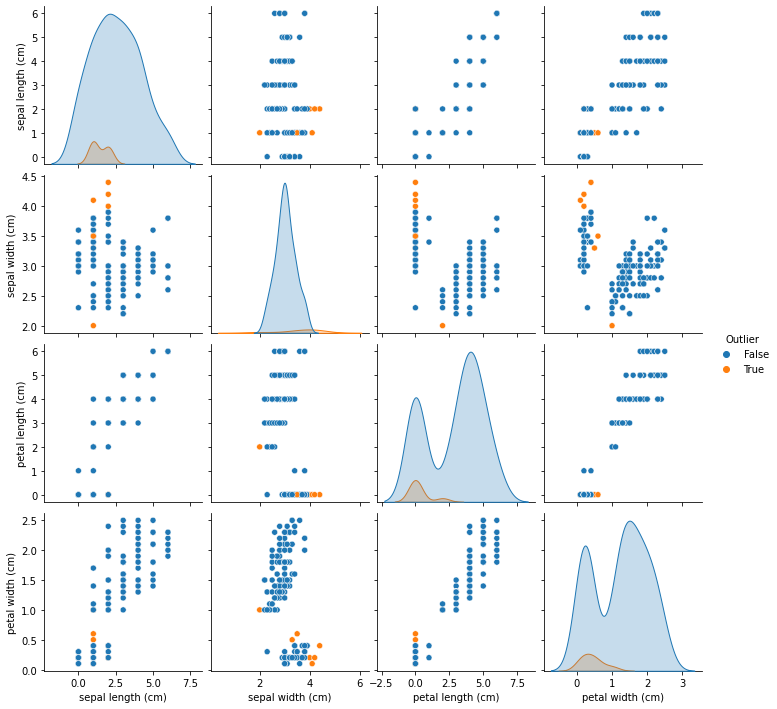

In [22]:
sns.pairplot(X, hue='Outlier')